# Lecture 10 - Deep Learning (1)

* Let's get start with your first deep learning project with Keras.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

## Regression

In [2]:
df_housing = pd.read_csv('./USA_Housing.csv')

In [3]:
x = df_housing.drop(['Price', 'Address'],axis=1)
y = df_housing[['Price']]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [5]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3186,59007.673232,5.880081,7.220505,6.49,33631.229175
632,62152.606027,7.034052,5.569340,3.17,42785.081776
577,71275.314897,6.311996,6.406945,4.45,28922.958895
2406,79575.250437,5.233785,5.860112,2.11,43679.484826
4686,74796.113226,6.249814,7.685292,6.05,40819.497441
...,...,...,...,...,...
2895,56734.350763,6.159101,8.280404,4.30,27982.271707
2763,50212.439535,6.645207,7.404114,5.44,20913.655444
905,80011.583519,6.448675,6.489268,2.49,26576.391994
3980,72899.658203,5.222040,6.861010,4.21,39311.147543


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
x_train

array([[0.45838372, 0.46767365, 0.52958955, 0.99777778, 0.45745385],
       [0.4933643 , 0.63648045, 0.31011882, 0.26      , 0.59544553],
       [0.5948347 , 0.53085568, 0.42145213, 0.54444444, 0.38647803],
       ...,
       [0.6920068 , 0.55084956, 0.43239443, 0.10888889, 0.35110421],
       [0.61290201, 0.37141318, 0.48180594, 0.49111111, 0.54307698],
       [0.5479133 , 0.37143195, 0.52201484, 0.72222222, 0.32937085]])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [9]:
model = Sequential()

model.add(Dense(20,activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.fit(x=x_train, y=y_train,
          validation_data=(x_test,y_test),
          batch_size=128,epochs=100)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 1646290010112.0000 - val_loss: 1636066656256.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1638463569920.0000 - val_loss: 1636057088000.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1645133824000.0000 - val_loss: 1636018683904.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1648623484928.0000 - val_loss: 1635882106880.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1643346132992.0000 - val_loss: 1635484041216.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1637402542080.0000 - val_loss: 1634497593344.0000
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1657158893568.0000 - val_loss: 1632363741184.0000
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1645581697024.0000 - val_loss: 1628194734080.0000
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1631766577152.0000 - val_loss: 1620648919040.0000
Epoch 10/100
30/30

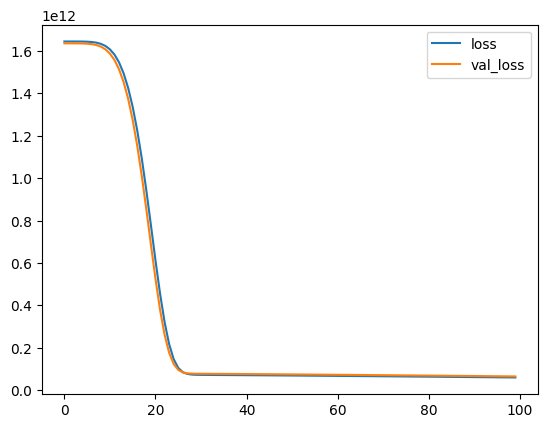

In [11]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [12]:
predictions = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [13]:
print(mean_absolute_error(y_test,predictions), np.sqrt(mean_squared_error(y_test,predictions)))

204440.25 254852.85379606797


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,205 (16.43 KB)

 Trainable params: 1,401 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,804 (10.96 KB)

## Classification

In [15]:
df_diabetes = pd.read_csv('./diabetes.csv')

In [16]:
x = df_diabetes.drop(['Outcome'], axis = 1)
y = df_diabetes['Outcome']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [18]:
scaler = MinMaxScaler()

x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
model = Sequential()

model.add(Dense(units=30,activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.fit(x=x_train,
          y=y_train,
          epochs=600,
          validation_data=(x_test, y_test))

Epoch 1/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.6807 - val_loss: 0.6700
Epoch 2/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6642 - val_loss: 0.6606
Epoch 3/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6576 - val_loss: 0.6517
Epoch 4/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6334 - val_loss: 0.6431
Epoch 5/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6291 - val_loss: 0.6335
Epoch 6/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6124 - val_loss: 0.6251
Epoch 7/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6227 - val_loss: 0.6179
Epoch 8/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5972 - val_loss: 0.6117
Epoch 9/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6322 - val_loss: 0.6036
Epoch 10/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6077 - val_loss: 0.5990
Epoch 11/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5747 - val_loss: 0.5893
Epoch 12/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

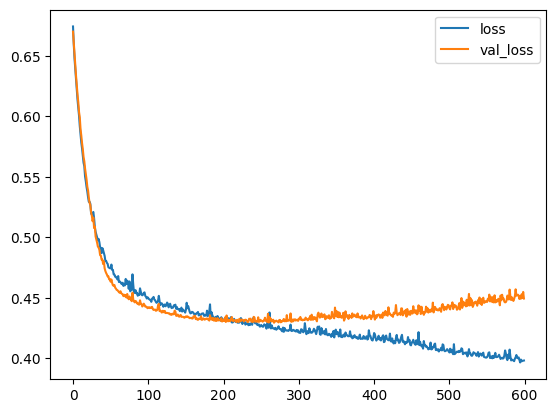

In [21]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [23]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [24]:
model = Sequential()
model.add(Dense(units=30,activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.fit(x=x_train,
          y=y_train,
          epochs=600,
          validation_data=(x_test, y_test),
          callbacks=[early_stop]
          )

Epoch 1/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.7505 - val_loss: 0.7101
Epoch 2/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7108 - val_loss: 0.6891
Epoch 3/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6877 - val_loss: 0.6784
Epoch 4/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6750 - val_loss: 0.6696
Epoch 5/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6702 - val_loss: 0.6620
Epoch 6/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6469 - val_loss: 0.6546
Epoch 7/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6770 - val_loss: 0.6499
Epoch 8/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6541 - val_loss: 0.6461
Epoch 9/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6387 - val_loss: 0.6409
Epoch 10/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6407 - val_loss: 0.6361
Epoch 11/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6236 - val_loss: 0.6321
Epoch 12/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

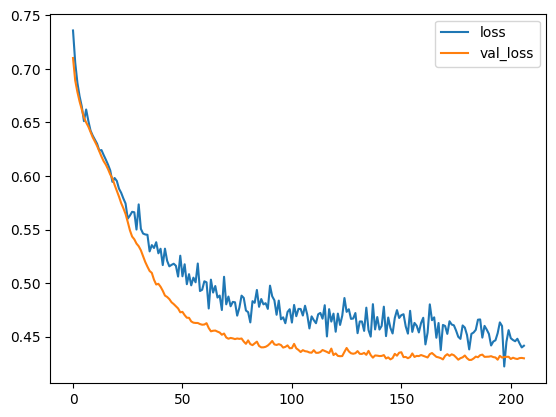

In [26]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

In [27]:
predict_x=(model.predict(x_test) > 0.5).astype("int64")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


In [28]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predict_x))

[[105  18]
 [ 20  49]]


In [29]:
print(accuracy_score(y_test,predict_x))

0.8020833333333334


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,255 (8.81 KB)

 Trainable params: 751 (2.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,504 (5.88 KB)